In [8]:
import numpy as np
import pandas as pd
import itertools
import nltk
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

In [9]:
avis_df = pd.read_csv('avis.csv')
details_df = pd.read_csv('details.csv')
infos_scrapping_df = pd.read_csv('infos_scrapping.csv')
jeux_df = pd.read_csv('jeux.csv')

In [10]:
avis_df.head()

,Unnamed: 0,_id,author,date_published,title_review,note,review_href,title,url,treated,comment
0,0,63c6726ea81f3e3016af9a56,Monsieur Guillaume,2021-01-27 11:06:44,Voyages sur les ailes des papillons,8.0,https://www.trictrac.net/avis/vraiment-bon-12514,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,1,63c6726ea81f3e3016af9a57,morlockbob,2020-10-18 10:04:21,le festival de Michoacan,7.0,https://www.trictrac.net/avis/le-festival-de-m...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,Comment continuer après un mega hit ? Simpleme...
2,2,63c6726ea81f3e3016af9a58,SwatSh,2021-02-01 08:35:08,Vivez la migration des monarques,7.0,https://www.trictrac.net/avis/vivez-la-migrati...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."
3,3,63c6726ea81f3e3016af9a59,Timi JeuxATheme,2020-11-19 17:04:57,Bon,8.0,NaN,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,NaN
4,4,63c6726ea81f3e3016af9a5a,prunelles,2021-05-24 12:43:18,Envolez-moi,9.0,https://www.trictrac.net/avis/envolez-moi,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Très joli bijou que ce jeu-là ! Le matériel, l..."


Bag of Words

In [11]:
cv = CountVectorizer()
avis_df['comment'] = avis_df['comment'].fillna('')
bow = cv.fit_transform(avis_df['comment'])
#cv.vocabulary_
print(bow[0])

  (0, 76103)	2
  (0, 74298)	1
  (0, 70442)	3
  (0, 49279)	4
  (0, 18060)	4
  (0, 113555)	1
  (0, 70955)	1
  (0, 98672)	3
  (0, 103854)	2
  (0, 117392)	1
  (0, 23128)	1
  (0, 122278)	1
  (0, 64444)	1
  (0, 88869)	2
  (0, 48309)	1
  (0, 107877)	1
  (0, 46591)	1
  (0, 49175)	1
  (0, 13628)	1
  (0, 49467)	7
  (0, 110849)	1
  (0, 23557)	1
  (0, 62643)	1
  (0, 34651)	3
  (0, 91198)	2
  :	:
  (0, 98851)	1
  (0, 13324)	1
  (0, 16753)	1
  (0, 8168)	1
  (0, 7655)	1
  (0, 44810)	1
  (0, 64339)	2
  (0, 76901)	2
  (0, 131792)	1
  (0, 130687)	2
  (0, 76498)	1
  (0, 91724)	1
  (0, 98248)	1
  (0, 11512)	1
  (0, 77791)	1
  (0, 90392)	1
  (0, 136754)	1
  (0, 71501)	1
  (0, 71263)	1
  (0, 82728)	1
  (0, 87183)	1
  (0, 47963)	1
  (0, 137681)	1
  (0, 36340)	1
  (0, 54602)	1


In [12]:
print(bow[1].toarray() , sum(*bow[1].toarray()))

[[0 0 0 ... 0 0 0]] 146


In [14]:
# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(bow)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 246524 samples in 0.029s...
[t-SNE] Computed neighbors for 246524 samples in 2990.195s...
[t-SNE] Computed conditional probabilities for sample 1000 / 246524
[t-SNE] Computed conditional probabilities for sample 2000 / 246524
[t-SNE] Computed conditional probabilities for sample 3000 / 246524
[t-SNE] Computed conditional probabilities for sample 4000 / 246524
[t-SNE] Computed conditional probabilities for sample 5000 / 246524
[t-SNE] Computed conditional probabilities for sample 6000 / 246524
[t-SNE] Computed conditional probabilities for sample 7000 / 246524
[t-SNE] Computed conditional probabilities for sample 8000 / 246524
[t-SNE] Computed conditional probabilities for sample 9000 / 246524
[t-SNE] Computed conditional probabilities for sample 10000 / 246524
[t-SNE] Computed conditional probabilities for sample 11000 / 246524
[t-SNE] Computed conditional probabilities for sample 12000 / 246524
[t-SNE] Computed conditional pro

[t-SNE] Computed conditional probabilities for sample 124000 / 246524
[t-SNE] Computed conditional probabilities for sample 125000 / 246524
[t-SNE] Computed conditional probabilities for sample 126000 / 246524
[t-SNE] Computed conditional probabilities for sample 127000 / 246524
[t-SNE] Computed conditional probabilities for sample 128000 / 246524
[t-SNE] Computed conditional probabilities for sample 129000 / 246524
[t-SNE] Computed conditional probabilities for sample 130000 / 246524
[t-SNE] Computed conditional probabilities for sample 131000 / 246524
[t-SNE] Computed conditional probabilities for sample 132000 / 246524
[t-SNE] Computed conditional probabilities for sample 133000 / 246524
[t-SNE] Computed conditional probabilities for sample 134000 / 246524
[t-SNE] Computed conditional probabilities for sample 135000 / 246524
[t-SNE] Computed conditional probabilities for sample 136000 / 246524
[t-SNE] Computed conditional probabilities for sample 137000 / 246524
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 244000 / 246524
[t-SNE] Computed conditional probabilities for sample 245000 / 246524
[t-SNE] Computed conditional probabilities for sample 246000 / 246524
[t-SNE] Computed conditional probabilities for sample 246524 / 246524
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 121.668480
[t-SNE] KL divergence after 300 iterations: 7.425850


In [18]:
from sklearn.decomposition import TruncatedSVD

# Perform dimensionality reduction with TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_results = svd.fit_transform(bow)

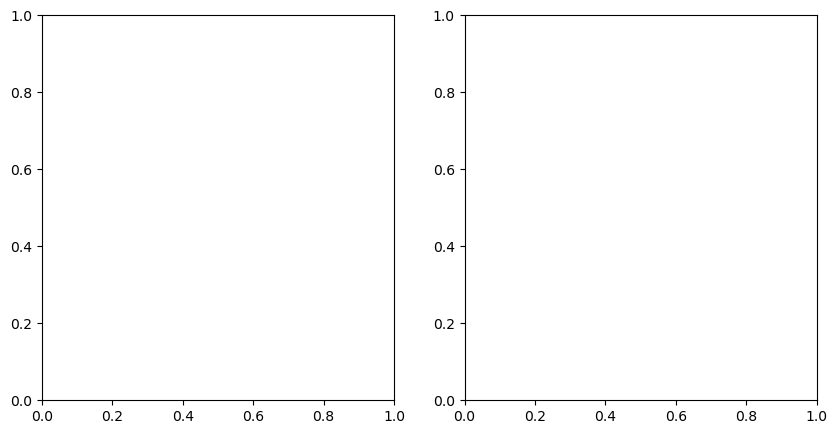

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

In [20]:
ax[0].scatter(tsne_results[:,0], tsne_results[:,1])
ax[0].set_title('t-SNE')

Text(0.5, 1.0, 't-SNE')

In [22]:
ax[1].scatter(svd_results[:,0], svd_results[:,1])
ax[1].set_title('PCA/svd')

Text(0.5, 1.0, 'PCA/svd')

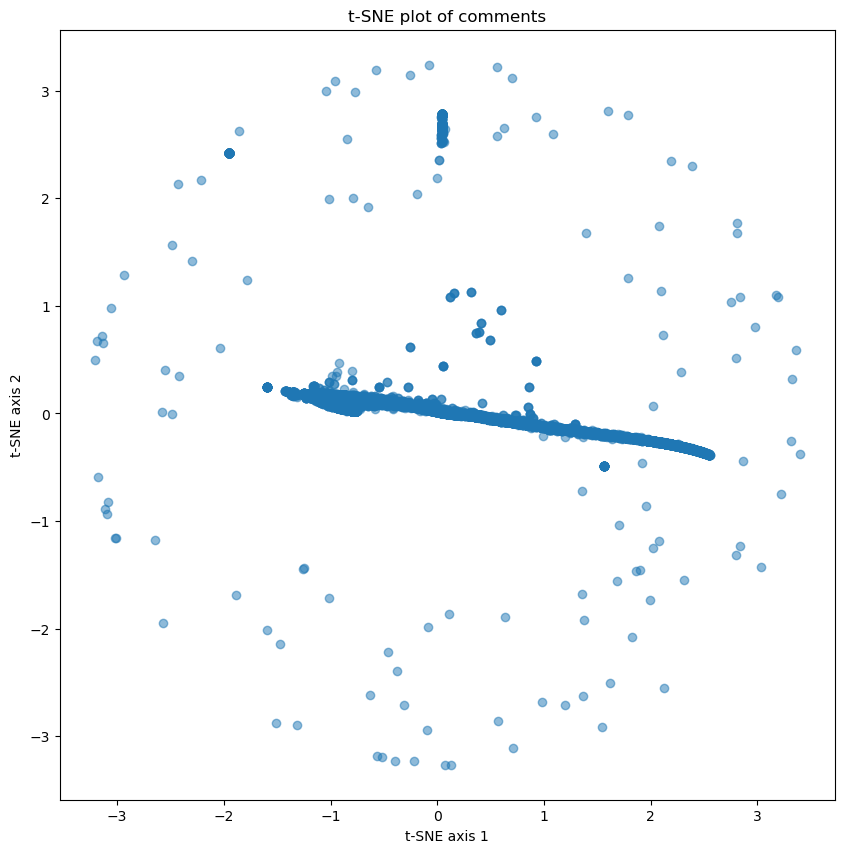

In [24]:
# Plot the t-SNE results
plt.figure(figsize=(10,10))
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=0.5)
plt.title('t-SNE plot of comments')
plt.xlabel('t-SNE axis 1')
plt.ylabel('t-SNE axis 2')
plt.show()

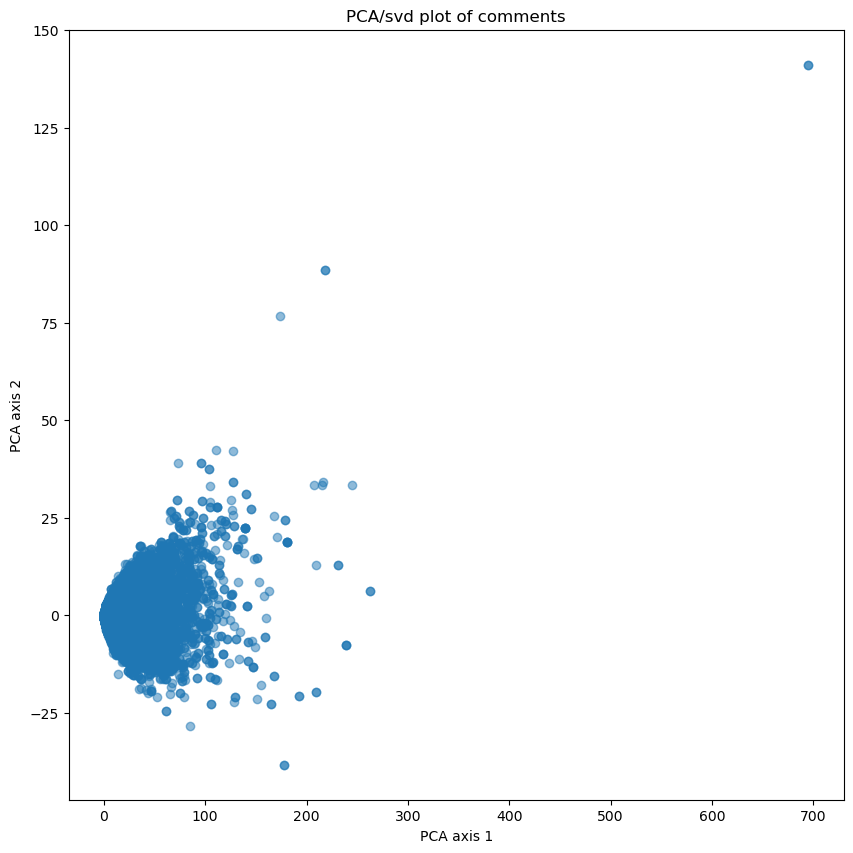

In [25]:
# Plot the PCA results
plt.figure(figsize=(10,10))
plt.scatter(svd_results[:,0], svd_results[:,1], alpha=0.5)
plt.title('PCA/svd plot of comments')
plt.xlabel('PCA axis 1')
plt.ylabel('PCA axis 2')
plt.show()